### Betting Problem- Value Iteration ###

In [301]:
"Value Iteration for Sports Betting"
"Value iteration helps generate v* (optimal value function) and pi* (optimal policy function)"

import numpy as np
import sys
import matplotlib.pyplot as plt

def value_iteration_for_betting(p, theta=0.0001):
    rewards = np.zeros(101)
    rewards[100] = 1 
    gamma = 1
    
    V = np.zeros(101)
    
    #V[25] = 0.1
    
    def single_step(num, V, rewards):
        A = np.zeros(101)
        for bet in range(1, min(num, 100-num)+1):
            win = num + bet
            lose = num - bet
            A[bet] = p * (rewards[win] + V[win]*gamma) + (1-p) * (rewards[lose] + V[lose]*gamma)
            # This is the core of the Bellman equation: The expected value of your action is 
            # the sum of immediate rewards and the value of the next state.
        return A
        
    while True:
        delta = 0
        for num in range(1, 100):
            # a single-step to find the best action
            A = single_step(num, V, rewards)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[num]))
            # Update the value function. 
            V[num] = best_action_value        
        if delta < theta:
            break
            
    
    policy = [0 for _ in range(101)]
    for num in range(1, 100):
        # single step to find the best action for this state
        A = single_step(num, V, rewards)
        best_action = np.argmax(A)
        # Always take the best action
        policy[num] = best_action
        
        
    
    return policy, V

In [302]:
policy, v = value_iteration_for_betting(0.4)

In [303]:
a1 = policy
print("Policy:")
print(policy)

Policy:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 11, 15, 9, 17, 7, 19, 20, 21, 22, 23, 24, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 38, 39, 40, 9, 8, 43, 44, 45, 4, 47, 2, 1, 50, 1, 2, 3, 4, 5, 6, 7, 8, 41, 10, 11, 12, 13, 14, 15, 34, 8, 18, 19, 20, 4, 22, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [304]:
b1 = v
print("Value Function:")
print(v)

Value Function:
[0.         0.00203162 0.00515507 0.00922512 0.01290418 0.01738208
 0.02306279 0.02781403 0.03227457 0.03767825 0.04346082 0.05035153
 0.05765757 0.06521897 0.06953507 0.07442925 0.08068842 0.08660695
 0.09421092 0.10313138 0.10865755 0.11596417 0.12587883 0.1335785
 0.1441471  0.16       0.16309304 0.16774251 0.17383767 0.17936474
 0.18607649 0.19459454 0.20172104 0.20841305 0.21652655 0.22519453
 0.2355273  0.24648826 0.25785582 0.2643026  0.27164589 0.28103263
 0.28991593 0.30131638 0.31471349 0.32298754 0.33394956 0.3488281
 0.36036974 0.37622184 0.4        0.40309304 0.40774251 0.41383767
 0.41936474 0.42607649 0.43459454 0.44172104 0.44841305 0.45652655
 0.46519453 0.4755273  0.48648826 0.49785582 0.5043026  0.51164589
 0.52103263 0.52991593 0.54131638 0.55471349 0.56298754 0.57394956
 0.5888281  0.60036974 0.61622184 0.64       0.6446455  0.65161885
 0.66075673 0.66904783 0.67911672 0.69189296 0.70258156 0.71261958
 0.72478983 0.73779252 0.75329686 0.7697331  0.7

In [305]:
policy1, v1 = value_iteration_for_betting(0.4)

In [306]:
a3 = policy1
print("Policy:")
print(policy1)
print("")

Policy:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 11, 15, 9, 17, 7, 19, 20, 21, 22, 23, 24, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 38, 39, 40, 9, 8, 43, 44, 45, 4, 47, 2, 1, 50, 1, 2, 3, 4, 5, 6, 7, 8, 41, 10, 11, 12, 13, 14, 15, 34, 8, 18, 19, 20, 4, 22, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]



In [307]:
print(np.array_equal(a1,a3))

True


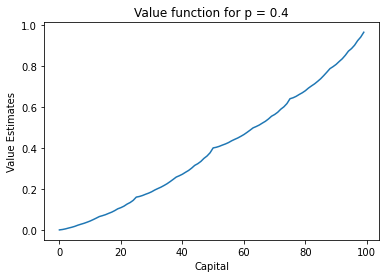

In [308]:
x = range(100)
y = v[:100]
 
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for p = 0.4')
plt.show()

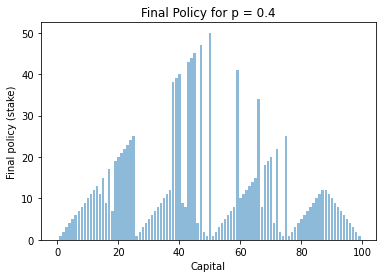

In [309]:
x = range(100)
y = policy[:100]

plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy for p = 0.4')
plt.show()

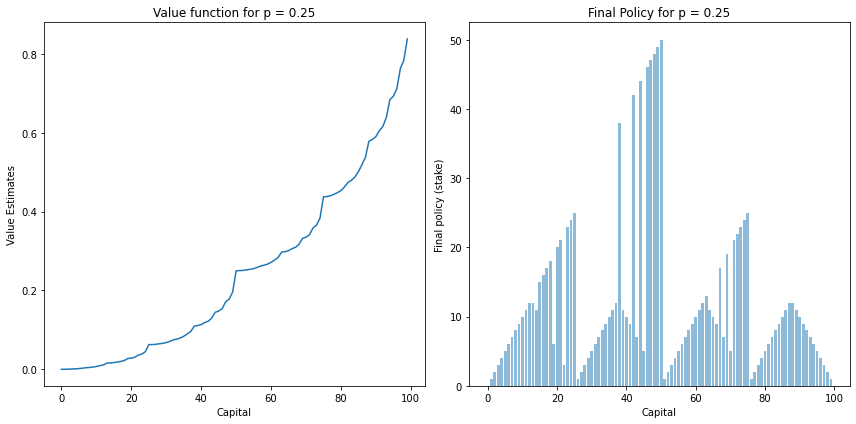

In [310]:
policy, v = value_iteration_for_betting(0.25)
x = range(100)
y = v[:100]
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for p = 0.25')


x = range(100)
y = policy[:100]
plt.subplot(1,2,2)
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy for p = 0.25')
plt.tight_layout()
plt.show()

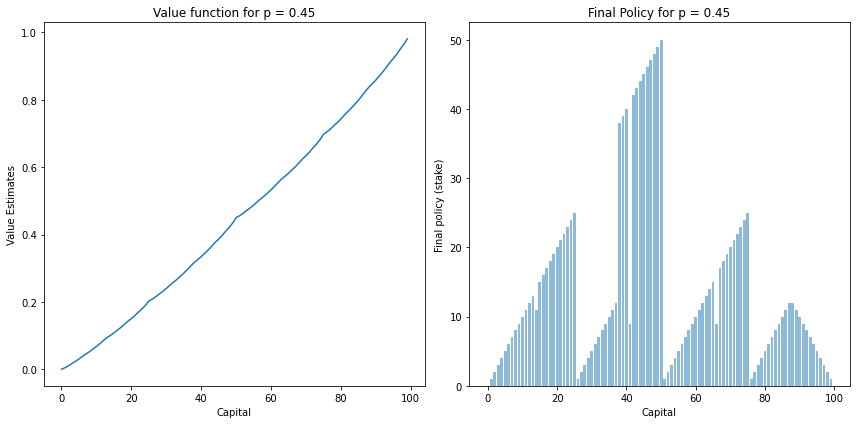

In [311]:
policy, v = value_iteration_for_betting(0.45)
x = range(100)
y = v[:100]
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for p = 0.45')


x = range(100)
y = policy[:100]
plt.subplot(1,2,2)
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy for p = 0.45')
plt.tight_layout()
plt.show()

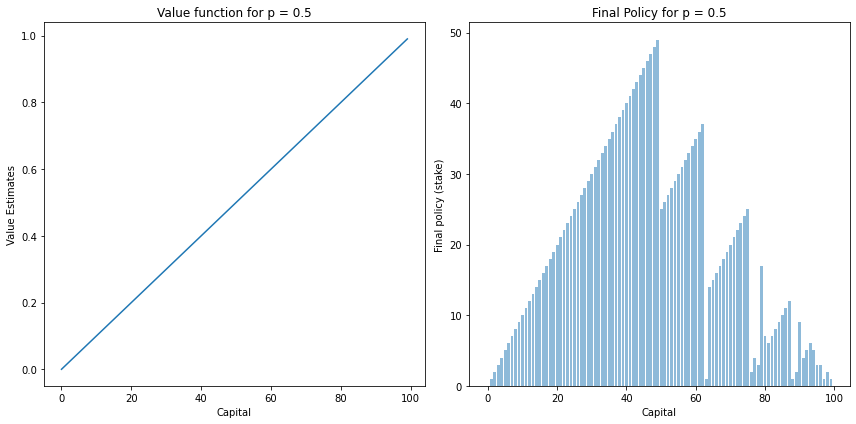

In [312]:
policy, v = value_iteration_for_betting(0.5)
x = range(100)
y = v[:100]
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for p = 0.5')


x = range(100)
y = policy[:100]
plt.subplot(1,2,2)
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy for p = 0.5')
plt.tight_layout()
plt.show()

In [313]:
import numpy as np
import sys
import matplotlib.pyplot as plt

def value_iteration_for_betting(p, theta=0.0001):
    rewards = np.zeros(101)
    rewards[100] = 1 
    gamma = 0.8
    
    V = np.zeros(101)
    #V[25] = 0.5
    
    def single_step(num, V, rewards):
        A = np.zeros(101)
        for bet in range(1, min(num, 100-num)+1):
            win = num + bet
            lose = num - bet
            A[bet] = p * (rewards[win] + V[win]*gamma) + (1-p) * (rewards[lose] + V[lose]*gamma)
            # This is the core of the Bellman equation: The expected value of your action is 
            # the sum of immediate rewards and the value of the next state.
        return A
    
    while True:
        delta = 0
        for num in range(1, 100):
            # a single-step to find the best action
            A = single_step(num, V, rewards)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[num]))
            # Update the value function. 
            V[num] = best_action_value        
        if delta < theta:
            break
    
    
    policy = [0 for _ in range(101)]
    for num in range(1, 100):
        # single step to find the best action for this state
        A = single_step(num, V, rewards)
        best_action = np.argmax(A)
        # Always take the best action
        policy[num] = best_action
    
    return policy, V

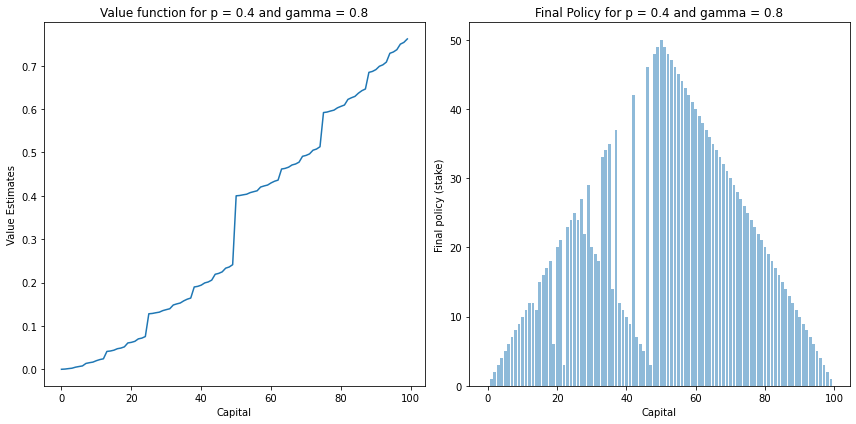

In [314]:
policy, v = value_iteration_for_betting(0.4)
x = range(100)
y = v[:100]
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for p = 0.4 and gamma = 0.8')


x = range(100)
y = policy[:100]
plt.subplot(1,2,2)
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy for p = 0.4 and gamma = 0.8')
plt.tight_layout()
plt.show()

### Betting Problem- Policy Iteration ###

In [315]:
import numpy as np
import random

def single_step(num,V, p = 0.4):
    rewards = np.zeros(101)
    rewards[100] = 1
    A = np.zeros(101)
    
    for bet in range(1,min(num, 100-num)+1):
        win = num + bet
        lose = num - bet
        A[bet] = p * (rewards[win] + V[win]) + (1-p) * (rewards[lose] + V[lose])
    return A

In [316]:
def evaluate_policy(policy, theta = 0.0001, max_backups=1000):
    old_values = np.zeros(101)
    for i in range(max_backups):
        delta = 0
        new_values = np.zeros(101)
        for num in range(1,100):
            action_values = single_step(num,old_values)
            new_values[num] = action_values[int(policy[num])]
        if np.max(np.abs(new_values-old_values)) < theta:
            break
            
        old_values = new_values
    return new_values

In [317]:
def policy_improvement(value_function):
    policy = np.zeros(101)
    for num in range(1,100):
        action_values = single_step(num,value_function)
        policy[num] = np.argmax(action_values)
    #print("Optimal policy is \n") 
    #print(policy)
    return policy

In [318]:
def policy_iteration():
    old_policy = np.zeros(101)
    for i in range(100):
        value_function = evaluate_policy(old_policy)
        a2 = value_function
        #print(value_function)
        new_policy = policy_improvement(value_function)
        if np.array_equal(old_policy,new_policy):
            break
        old_policy = new_policy
    return a2

In [319]:
a2 = policy_iteration()

In [320]:
print(a2)

[0.         0.00206121 0.00515303 0.00922512 0.01290295 0.01738208
 0.02306279 0.02780229 0.03226961 0.03768437 0.04345519 0.05035153
 0.05765697 0.06523347 0.06952406 0.07442925 0.08067403 0.08660573
 0.09421092 0.10313682 0.10865021 0.11596344 0.12587883 0.13357072
 0.14414243 0.16       0.16309182 0.16772954 0.17383767 0.17935443
 0.18606088 0.19459418 0.20170343 0.20840442 0.21652655 0.22518279
 0.2355273  0.24648546 0.2578502  0.26428609 0.27162552 0.28101105
 0.28990859 0.30131638 0.31470523 0.32297531 0.33394516 0.34881824
 0.36035609 0.37621365 0.4        0.40309182 0.40772954 0.41383767
 0.41935443 0.42606088 0.43459418 0.44170343 0.44840442 0.45652655
 0.46516444 0.4755273  0.48648546 0.4978502  0.50428609 0.51162552
 0.52101105 0.52990859 0.54131638 0.55470523 0.56294779 0.57394516
 0.58881824 0.60035609 0.61621365 0.64       0.64463772 0.65159431
 0.66075651 0.66903164 0.67909133 0.69189128 0.70255514 0.71260663
 0.72478983 0.73777418 0.75327872 0.76972819 0.7867753  0.7964

In [333]:
print(policy)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 15, 16, 17, 18, 6, 20, 21, 3, 23, 24, 25, 24, 27, 22, 29, 20, 19, 18, 33, 34, 35, 14, 37, 12, 11, 10, 9, 42, 7, 6, 5, 46, 3, 48, 49, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [321]:
print(np.array_equal(a1,a2))

False


## Expected Value ##

In [322]:
import numpy as np
count = 0
nterms = 1
p = 0.6

v = np.zeros(101)
v[0] = 0
v[100] = 1


while count < nterms:
    v[50] = p*v[0] + (1-p)*v[100]
    v[25] = p*v[0] + (1-p)*v[50]
    v[13] = p*v[0] + (1-p)*v[25]
    v[7] = p*v[0] + (1-p)*v[13]
    v[10] = p*v[7] + (1-p)*v[13]
    v[5] = p*v[0] + (1-p)*v[10]
    v[6] = p*v[5] + (1-p)*v[7]
    v[3] = p*v[0] + (1-p)*v[6]
    v[4] = p*v[3] + (1-p)*v[5]
    v[2] = p*v[0] + (1-p)*v[4]
    v[1] = p*v[0] + (1-p)*v[2]
    v[8] = p*v[6] + (1-p)*v[10]
    v[9] = p*v[8] + (1-p)*v[10]
    v[11] = p*v[9] + (1-p)*v[13]
    v[12] = p*v[11] + (1-p)*v[13]
    v[18] = p*v[11] + (1-p)*v[25]
    v[15] = p*v[12] + (1-p)*v[18]
    v[14] = p*v[13] + (1-p)*v[15]
    v[16] = p*v[14] + (1-p)*v[18]
    v[17] = p*v[16] + (1-p)*v[18]
    v[21] = p*v[17] + (1-p)*v[25]
    v[19] = p*v[17] + (1-p)*v[21]
    v[20] = p*v[19] + (1-p)*v[21]
    v[22] = p*v[19] + (1-p)*v[25]
    v[23] = p*v[21] + (1-p)*v[25]
    v[24] = p*v[23] + (1-p)*v[25]
    v[37] = p*v[24] + (1-p)*v[50]
    v[31] = p*v[25] + (1-p)*v[37]
    v[28] = p*v[25] + (1-p)*v[31]
    v[26] = p*v[24] + (1-p)*v[28]
    v[27] = p*v[26] + (1-p)*v[28]
    v[29] = p*v[27] + (1-p)*v[31]
    v[30] = p*v[29] + (1-p)*v[31]
    v[34] = p*v[31] + (1-p)*v[37]
    v[32] = p*v[30] + (1-p)*v[34]
    v[33] = p*v[32] + (1-p)*v[34]
    v[35] = p*v[33] + (1-p)*v[37]
    v[36] = p*v[35] + (1-p)*v[37]
    v[42] = p*v[36] + (1-p)*v[50]
    v[39] = p*v[36] + (1-p)*v[42]
    v[38] = p*v[37] + (1-p)*v[39]
    v[40] = p*v[38] + (1-p)*v[42]
    v[41] = p*v[40] + (1-p)*v[42]
    v[46] = p*v[42] + (1-p)*v[50]
    v[44] = p*v[42] + (1-p)*v[46]
    v[43] = p*v[42] + (1-p)*v[44]
    v[45] = p*v[44] + (1-p)*v[46]
    v[12] = p*v[11] + (1-p)*v[13]
    v[48] = p*v[46] + (1-p)*v[50]
    v[47] = p*v[46] + (1-p)*v[48]
    v[49] = p*v[48] + (1-p)*v[50]
    v[76] = p*v[50] + (1-p)*v[100]
    v[63] = p*v[50] + (1-p)*v[76]
    v[56] = p*v[50] + (1-p)*v[63]
    v[53] = p*v[50] + (1-p)*v[56]
    v[58] = p*v[53] + (1-p)*v[63]
    v[54] = p*v[50] + (1-p)*v[58]
    v[55] = p*v[54] + (1-p)*v[56]
    v[57] = p*v[56] + (1-p)*v[58]
    v[52] = p*v[50] + (1-p)*v[54]
    v[51] = p*v[50] + (1-p)*v[52]
    v[60] = p*v[57] + (1-p)*v[63]
    v[59] = p*v[58] + (1-p)*v[60]
    v[61] = p*v[59] + (1-p)*v[63]
    v[62] = p*v[61] + (1-p)*v[63]
    v[69] = p*v[62] + (1-p)*v[76]
    v[65] = p*v[63] + (1-p)*v[69]
    v[64] = p*v[63] + (1-p)*v[65]
    v[67] = p*v[65] + (1-p)*v[69]
    v[68] = p*v[67] + (1-p)*v[69]
    v[66] = p*v[65] + (1-p)*v[67]
    v[71] = p*v[68] + (1-p)*v[76]
    v[70] = p*v[69] + (1-p)*v[71]
    v[73] = p*v[70] + (1-p)*v[76]
    v[72] = p*v[71] + (1-p)*v[73]
    v[74] = p*v[72] + (1-p)*v[76]
    v[75] = p*v[74] + (1-p)*v[76]
    v[88] = p*v[76] + (1-p)*v[100]
    v[94] = p*v[88] + (1-p)*v[100]
    v[97] = p*v[94] + (1-p)*v[100]
    v[91] = p*v[88] + (1-p)*v[94]
    v[81] = p*v[76] + (1-p)*v[88]
    v[78] = p*v[75] + (1-p)*v[81]
    v[77] = p*v[76] + (1-p)*v[78]
    v[79] = p*v[77] + (1-p)*v[81]
    v[80] = p*v[79] + (1-p)*v[81]
    v[84] = p*v[80] + (1-p)*v[88]
    v[82] = p*v[80] + (1-p)*v[84]
    v[83] = p*v[82] + (1-p)*v[84]
    v[85] = p*v[82] + (1-p)*v[88]
    v[86] = p*v[84] + (1-p)*v[88]
    v[87] = p*v[86] + (1-p)*v[88]
    v[89] = p*v[87] + (1-p)*v[91]
    v[90] = p*v[89] + (1-p)*v[91]
    v[92] = p*v[90] + (1-p)*v[94]
    v[93] = p*v[92] + (1-p)*v[94]
    v[95] = p*v[93] + (1-p)*v[97]
    v[96] = p*v[95] + (1-p)*v[97]
    v[98] = p*v[96] + (1-p)*v[100]
    v[99] = p*v[98] + (1-p)*v[100]
    v[100] = 0
    
    b2 = v
    print("expected return:\n", v)
    count += 1

expected return:
 [0.         0.00181928 0.0045482  0.00802816 0.0113705  0.016384
 0.0200704  0.0256     0.02842624 0.03343974 0.04096    0.04566385
 0.05299831 0.064      0.06574332 0.06835831 0.07600532 0.08216251
 0.09139831 0.09461651 0.10208891 0.11329751 0.12076991 0.1319785
 0.1431871  0.16       0.15541065 0.16274477 0.17374596 0.17539283
 0.18298166 0.1943649  0.19578253 0.20346306 0.21498385 0.22044274
 0.23063055 0.24591226 0.25063922 0.25772966 0.26973486 0.28119225
 0.29837833 0.30488212 0.3146378  0.32439348 0.339027   0.34878268
 0.3634162  0.37804972 0.4        0.40304742 0.40761856 0.41536
 0.4190464  0.42678784 0.4384     0.4420864  0.447616   0.45403034
 0.46365184 0.4708182  0.48089092 0.496      0.50376553 0.51541382
 0.52007314 0.52706211 0.53405109 0.54453455 0.55729299 0.57643065
 0.58200871 0.5903758  0.60520523 0.61912314 0.64       0.64420555
 0.65051388 0.66556333 0.678378   0.6976     0.69527752 0.70541723
 0.7206268  0.73076651 0.74597608 0.76118565 0.784

In [330]:
#b1 : value iteration
#b2 : expected return
error = np.subtract(b1, b2)
squared_error = np.square(error)
mse = squared_error.mean()
print("mse for value iteration:  ", mse)

mse for value iteration:   2.8363355630201136e-05


In [331]:
#a2 : policy iteration
#b2 : expected return
error = np.subtract(a2, b2)
squared_error = np.square(error)
mse = squared_error.mean()
print("mse for policy iteration: ",mse)

mse for policy iteration:  2.828560846438454e-05
